In [1]:
!pip install ipython-autotime --quiet
%load_ext autotime

time: 382 µs (started: 2024-09-20 10:48:08 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time: 530 ms (started: 2024-09-20 10:48:08 +00:00)


In [3]:
class RSAOptimizer:
    def __init__(self, obj_func, lb, ub, dim, pop_size=30, max_iter=100):
        self.obj_func = obj_func  # objective function to be minimized
        self.lb = np.array(lb)  # lower bounds of variables
        self.ub = np.array(ub)  # Upper bounds of variables
        self.dim = dim  # number of variables
        self.pop_size = pop_size  # population size
        self.max_iter = max_iter  # maximum number of iterations
        self.alpha = 0.1  # control parameter 1
        self.beta = 0.005  # control parameter 2

    def initialize_population(self):
        return np.random.uniform(self.lb, self.ub, (self.pop_size, self.dim))

    def evaluate_population(self, population):
        return np.array([self.obj_func(ind) for ind in population])

    def update_ES(self, t):
        return 2 * np.random.randint(-1, 2) * (1 - t / self.max_iter)

    def update_position(self, population, best_solution, t):
        ES = self.update_ES(t)
        new_population = np.zeros_like(population)

        for i in range(self.pop_size):
            for j in range(self.dim):
                R = (best_solution[j] - population[np.random.randint(self.pop_size), j]) / (best_solution[j] + np.finfo(float).eps)
                P = self.alpha + (population[i, j] - np.mean(population[:, j])) / (best_solution[j] * (self.ub[j] - self.lb[j]) + np.finfo(float).eps)
                eta = best_solution[j] * P

                #1 high walking
                if t <= self.max_iter / 4:
                    new_population[i, j] = best_solution[j] - eta * self.beta - R * np.random.rand()
                #2  belly walking
                elif t <= self.max_iter / 2:
                    new_population[i, j] = best_solution[j] * population[np.random.randint(self.pop_size), j] * ES * np.random.rand()
                #3 hunting coordination
                elif t <= 3 * self.max_iter / 4:
                    new_population[i, j] = best_solution[j] * P * np.random.rand()
                #4 hunting cooperation
                else:
                    new_population[i, j] = best_solution[j] - eta * np.finfo(float).eps - R * np.random.rand()

        return new_population

    def optimize(self):
        # main optimization loop
        population = self.initialize_population()
        fitness = self.evaluate_population(population)
        best_idx = np.argmin(fitness)
        best_solution = population[best_idx]
        best_fitness = fitness[best_idx]

        fitness_history = [best_fitness]

        for t in range(1, self.max_iter + 1):
            new_population = self.update_position(population, best_solution, t)
            new_population = np.clip(new_population, self.lb, self.ub)
            new_fitness = self.evaluate_population(new_population)

            improvements = new_fitness < fitness
            population[improvements] = new_population[improvements]
            fitness[improvements] = new_fitness[improvements]

            best_idx = np.argmin(fitness)
            if fitness[best_idx] < best_fitness:
                best_solution = population[best_idx]
                best_fitness = fitness[best_idx]

            fitness_history.append(best_fitness)

            if t % 10 == 0:
                print(f"Iteration {t}: Best fitness = {best_fitness}")

        return best_solution, best_fitness, fitness_history

time: 3.57 ms (started: 2024-09-20 10:48:09 +00:00)


### Define Objective Function

In [4]:
def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

time: 467 µs (started: 2024-09-20 10:48:09 +00:00)


In [5]:
def ackley(x, a=20, b=0.2, c=2*np.pi):
    """
    x: vector of input values
    """
    d = len(x) # dimension of input vector x
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum(x*x) / d))
    cos_term = -np.exp(sum(np.cos(c*x) / d))
    return a + np.exp(1) + sum_sq_term + cos_term


time: 1.11 ms (started: 2024-09-20 10:48:09 +00:00)


### Define Optimizer

In [6]:
ITERATIONS = 500

POPULATION = 32

dim = 1000

lb = [-5.12] * dim

ub = [5.12] * dim

time: 720 µs (started: 2024-09-20 10:48:09 +00:00)


In [7]:
rastrigin_optimizer = RSAOptimizer(obj_func=rastrigin, lb=lb, ub=ub, dim=dim, pop_size=POPULATION, max_iter=ITERATIONS)
rastrigin_best_solution, rastrigin_best_fitness, rastrigin_fitness_history = rastrigin_optimizer.optimize()

print(f"\nRastrigin Function Results:")
print(f"Best solution: {rastrigin_best_solution}")
print(f"Best fitness: {rastrigin_best_fitness}")

Iteration 10: Best fitness = 17951.093170401222
Iteration 20: Best fitness = 17951.093170401222
Iteration 30: Best fitness = 17951.093170401222
Iteration 40: Best fitness = 17951.093170401222
Iteration 50: Best fitness = 17951.093170401222
Iteration 60: Best fitness = 17951.093170401222
Iteration 70: Best fitness = 17951.093170401222
Iteration 80: Best fitness = 17951.093170401222
Iteration 90: Best fitness = 17951.093170401222
Iteration 100: Best fitness = 17951.093170401222
Iteration 110: Best fitness = 17951.093170401222
Iteration 120: Best fitness = 17951.093170401222
Iteration 130: Best fitness = 0.0
Iteration 140: Best fitness = 0.0
Iteration 150: Best fitness = 0.0
Iteration 160: Best fitness = 0.0
Iteration 170: Best fitness = 0.0
Iteration 180: Best fitness = 0.0
Iteration 190: Best fitness = 0.0
Iteration 200: Best fitness = 0.0
Iteration 210: Best fitness = 0.0
Iteration 220: Best fitness = 0.0
Iteration 230: Best fitness = 0.0
Iteration 240: Best fitness = 0.0
Iteration 250

#### Convergence Plot

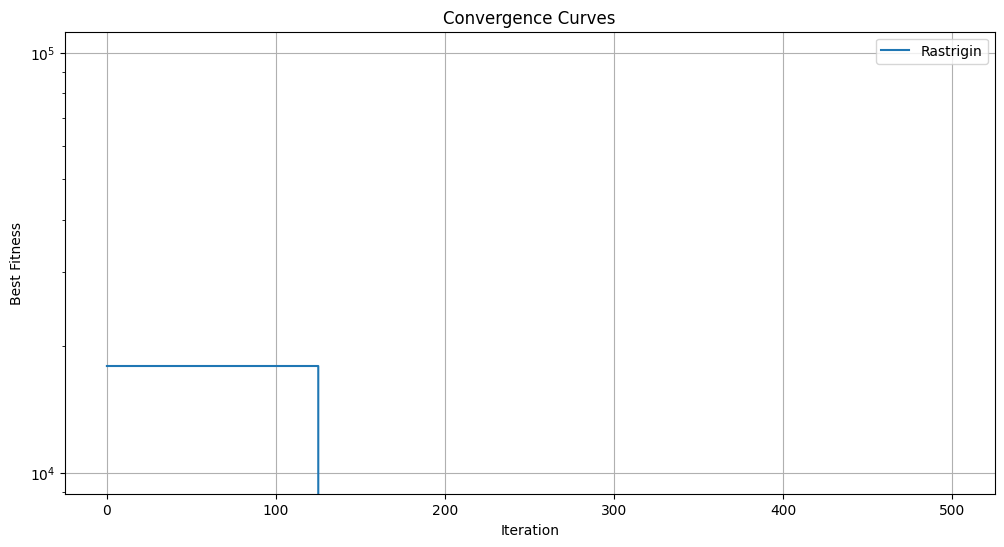

time: 511 ms (started: 2024-09-20 10:53:41 +00:00)


In [8]:
plt.figure(figsize=(12, 6))
plt.plot(rastrigin_fitness_history, label='Rastrigin')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Convergence Curves')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()